In [1]:
# Importing Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Data 	Description
* Loan_ID	Unique Loan ID
* Gender	Male/ Female
* Married	Applicant married (Y/N)
* Dependents	Number of dependents
* Education	Applicant Education (Graduate/ Under Graduate)
* Self_Employed	Self employed (Y/N)
* ApplicantIncome	Applicant income
* CoapplicantIncome	Coapplicant income
* LoanAmount	Loan amount in thousands
* Loan_Amount_Term	Term of loan in months
* Credit_History	credit history meets guidelines
* Property_Area	Urban/ Semi Urban/ Rural
* Loan_Status	(Target) Loan approved (Y/N)

In [2]:
df = pd.read_csv('C:\\Users\\vikas\\Downloads\\Great Learning\\HAckaThon\\loan Prediction\\train_ctrUa4K.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Exploring The Data

In [4]:
df.shape
# The data has 614 rows and 13 columns

(614, 13)

In [5]:
# columns in the dataset 
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
# Info About the dataset
df.info()
# Loan Amount, Applicant Income, Coapplicant Income, Credit History are the numerical columns in the data and rest all are 
# object columns in the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# Converting Credit History into Catgeorical Data
df['Credit_History'] = df['Credit_History'].astype(object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


In [9]:
# Detecting Nan Values in the data
df.isnull().sum().sort_values(ascending=False)
# There are nan values Credit History, Self Employed, Loan Amount, Dependents ,Loan Amount Term, Gender, Married.

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [10]:
# Treating Nan Values for categorical data
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0]) 
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

In [11]:
# Treating Nan Values for Numerical data 
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [12]:
# Detecting NAN values after outliers treatment
df.isnull().sum().sum()

0

In [13]:
# Splitting the data into numerical and categorical data
num_data = df.select_dtypes(include = np.number)
cat_data = df.select_dtypes(exclude = np.number)

In [14]:
# Descriptive Statistics for numerical data
num_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.000000,64.372489,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


# Inference :
* The average Applicant Income is 5403.45 thousand with a Standard Deviation of 6109.04.
* The average Co-Applicant Income is 1621.24 thousand with a Standard Deviation of 2926.24.
* The average Loan Amount is 146.41 thousand with a Standard Deviation of 84.03.
* The average Loan Amount Term is 342 months with a Standard Deviation of 64.37.
* The average Credit History is 0.85 months with a Standard Deviation of 0.352.

In [15]:
# Desciptive Statistics
cat_data.describe().T

,count,unique,top,freq
Loan_ID,614,614,LP001940,1
Gender,614,2,Male,502
Married,614,2,Yes,401
Dependents,614,4,0,360
Education,614,2,Graduate,480
Self_Employed,614,2,No,532
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


# Inference :
* Majority of applicants are Males applying for loan.
* Married people are applying for loan more than as compared to unmarried.
* Majortity of applicants are self employed.
* Applicant, Co-applicant and Loan Amount are numerical columns needs to converted into numerical data.
* 525 applicants has the credit history.
* 68% of the Loan Applications has been approved. 

# Univariate Analysis


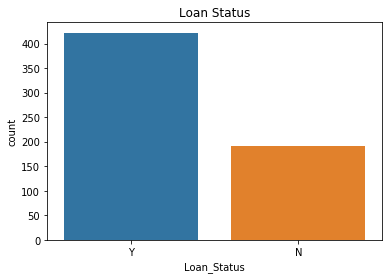

In [16]:
# Dependent Variable
sns.countplot(df['Loan_Status'])
plt.title('Loan Status')
plt.show()

In [17]:
df['Loan_Status'].value_counts()*100/len(df['Loan_Status'])

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

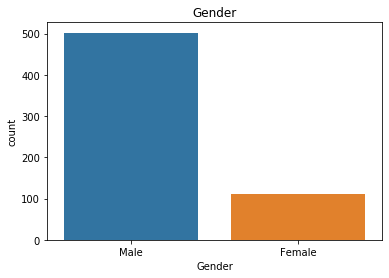

In [18]:
# Gender
sns.countplot(df['Gender'])
plt.title('Gender')
plt.show()

In [19]:
df['Gender'].value_counts()*100/len(df['Gender'])

Male      81.758958
Female    18.241042
Name: Gender, dtype: float64

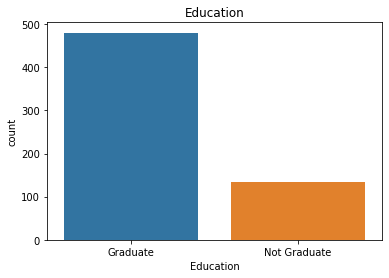

In [20]:
# Education
sns.countplot(df['Education'])
plt.title('Education')
plt.show()

In [21]:
df['Education'].value_counts()*100/len(df['Education'])

Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64

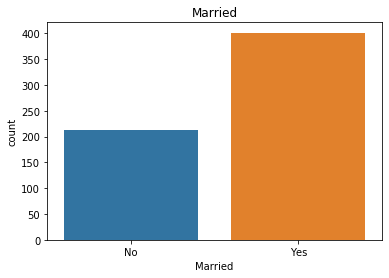

Yes    65.309446
No     34.690554
Name: Married, dtype: float64

In [22]:
# Married
sns.countplot(df['Married'])
plt.title('Married')
plt.show()
df['Married'].value_counts()*100/len(df['Married'])

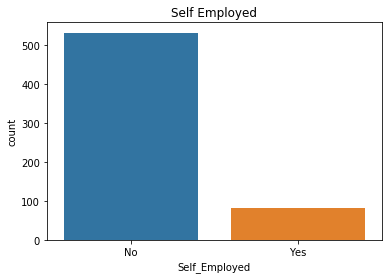

No     86.644951
Yes    13.355049
Name: Self_Employed, dtype: float64

In [23]:
# Self Employed
sns.countplot(df['Self_Employed'])
plt.title('Self Employed')
plt.show()
df['Self_Employed'].value_counts()*100/len(df['Self_Employed'])

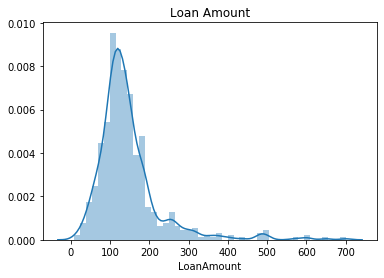

In [24]:
# Loan Amount 
sns.distplot(df['LoanAmount'],kde=True)
plt.title('Loan Amount')
plt.show()
# Inference : Distribution is right skewed.


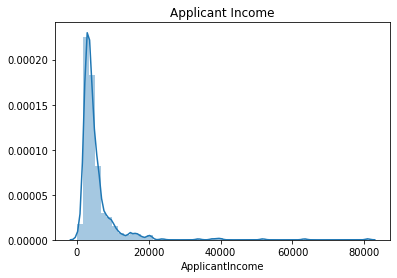

In [25]:
# Applicant Income
sns.distplot(df['ApplicantIncome'],kde=True)
plt.title('Applicant Income')
plt.show()
# Inference : Distribution is right skewed.

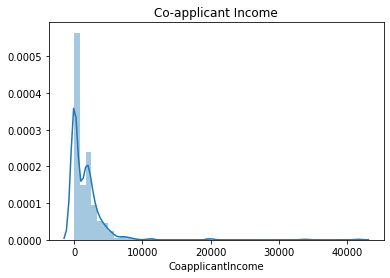

In [26]:
# Coapplicant Income
sns.distplot(df['CoapplicantIncome'],kde=True)
plt.title('Co-applicant Income')
plt.show()
# Inference : Distribution is right skewed.

In [27]:
from sklearn.preprocessing import FunctionTransformer
log_transform = FunctionTransformer(np.log1p)

In [28]:
# Treatment of Skewness
num_data['log_applicant_income'] = log_transform.fit_transform(num_data['ApplicantIncome'])
num_data['log_coapplicant_income'] = log_transform.fit_transform(num_data['CoapplicantIncome'])
num_data['log_loan_amount'] = log_transform.fit_transform(num_data['LoanAmount'])

C:\Users\vikas\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\vikas\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\vikas\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

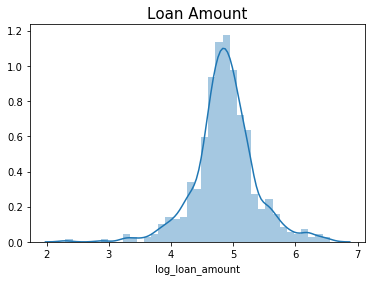

In [29]:
# Loan Amount
sns.distplot(num_data['log_loan_amount'])
plt.title('Loan Amount',size=15)
plt.show()

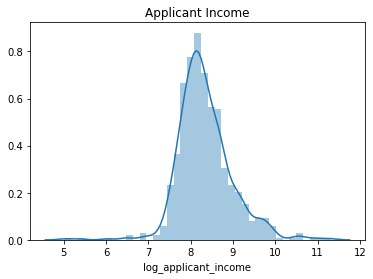

In [30]:
# Applicant Income
sns.distplot(num_data['log_applicant_income'])
plt.title('Applicant Income')
plt.show()

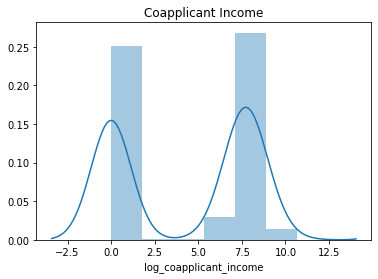

In [31]:
# Coapplicant Income
sns.distplot(num_data['log_coapplicant_income'])
plt.title('Coapplicant Income')
plt.show()

# Multi-variate Analysis

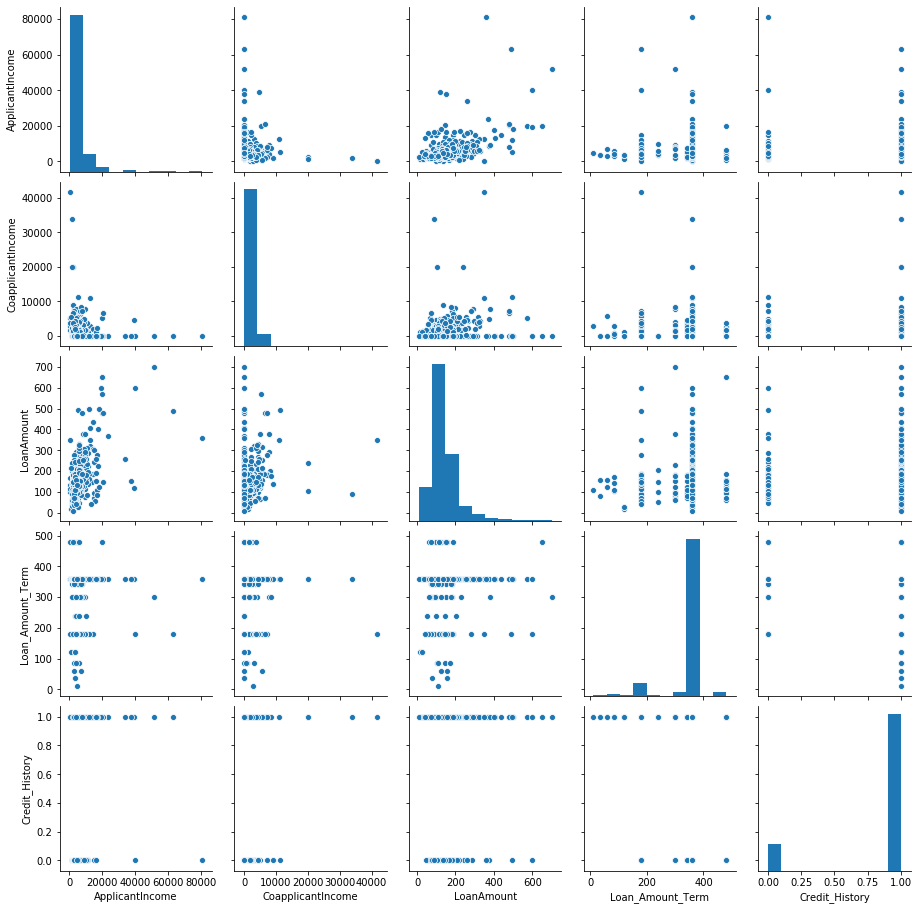

In [32]:
sns.pairplot(df)
plt.show()

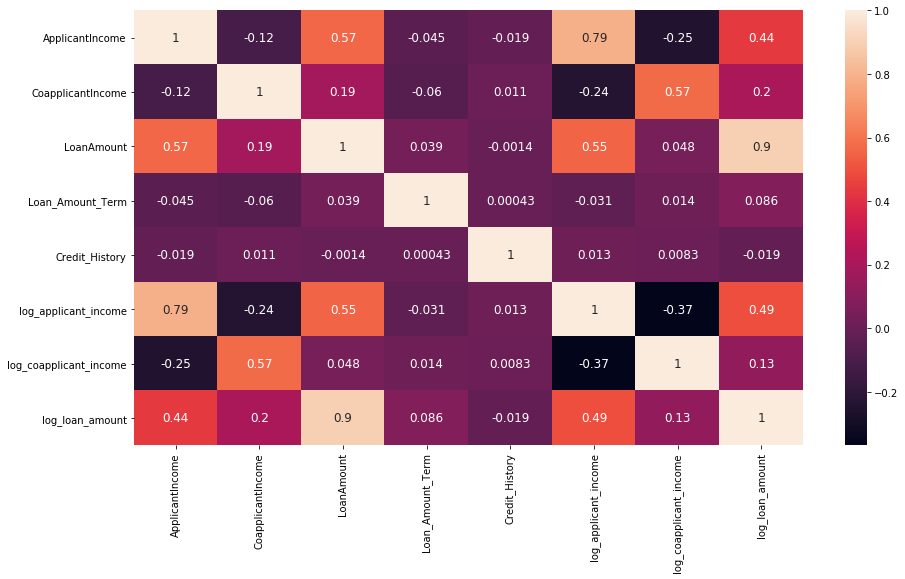

In [33]:
# Correlation Matrix
plt.figure(figsize=(15,8))
sns.heatmap(num_data.corr(),annot=True,annot_kws = ({'Size':12}))
plt.show()

In [34]:
# Encoding the Categorical Data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [35]:
for i in cat_data.columns:
    cat_data[i] = le.fit_transform(cat_data[i])

C:\Users\vikas\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
cat_data = pd.DataFrame(cat_data,columns = cat_data.columns)
cat_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,0,1,0,0,0,0,2,1
1,1,1,1,1,0,0,0,0
2,2,1,1,0,0,1,2,1
3,3,1,1,0,1,0,2,1
4,4,1,0,0,0,0,2,1


In [37]:
# Combining the Categorical data and Numerical Data into Single DataFrame
final_df = pd.concat([cat_data,num_data],axis=1)
final_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,log_applicant_income,log_coapplicant_income,log_loan_amount
0,0,1,0,0,0,0,2,1,5849,0.0,146.412162,360.0,1.0,8.674197,0.000000,4.993232
1,1,1,1,1,0,0,0,0,4583,1508.0,128.000000,360.0,1.0,8.430327,7.319202,4.859812
2,2,1,1,0,0,1,2,1,3000,0.0,66.000000,360.0,1.0,8.006701,0.000000,4.204693
3,3,1,1,0,1,0,2,1,2583,2358.0,120.000000,360.0,1.0,7.857094,7.765993,4.795791
4,4,1,0,0,0,0,2,1,6000,0.0,141.000000,360.0,1.0,8.699681,0.000000,4.955827


In [38]:
# Drop The columns
final_df.drop(columns=['LoanAmount','ApplicantIncome','CoapplicantIncome','Loan_ID'],axis=1,inplace=True)
final_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Loan_Amount_Term,Credit_History,log_applicant_income,log_coapplicant_income,log_loan_amount
0,1,0,0,0,0,2,1,360.0,1.0,8.674197,0.000000,4.993232
1,1,1,1,0,0,0,0,360.0,1.0,8.430327,7.319202,4.859812
2,1,1,0,0,1,2,1,360.0,1.0,8.006701,0.000000,4.204693
3,1,1,0,1,0,2,1,360.0,1.0,7.857094,7.765993,4.795791
4,1,0,0,0,0,2,1,360.0,1.0,8.699681,0.000000,4.955827


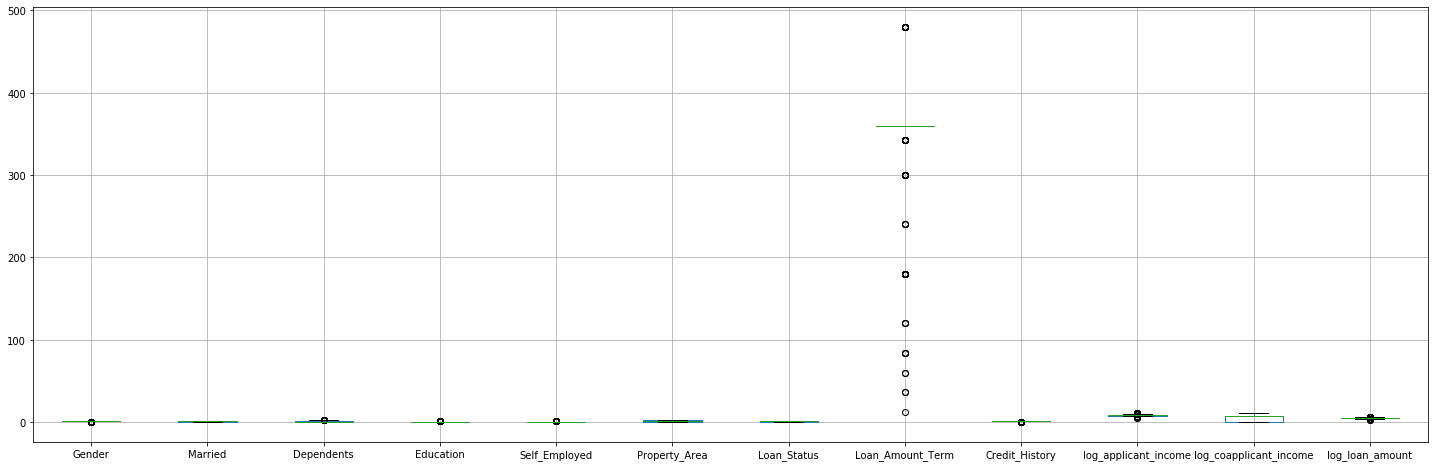

In [39]:
# Detecting Outliers

plt.figure(figsize=(25,8))
final_df.boxplot()
plt.show()

In [40]:
# Splitting the data into dependent and independent variables
inp = final_df.drop(['Loan_Status'],axis=1)
out = final_df['Loan_Status']

In [41]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(inp,out,test_size=0.3,random_state=10)

In [42]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose = 0,ignore_warnings=True,custom_metric=None)
model,prediction = clf.fit(xtrain,xtest,ytrain,ytest)
model.sort_values(by='Accuracy',ascending=False)

C:\Users\vikas\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
 97%|████████████████████████████████████████▌ | 29/30 [00:03<00:00,  7.10it/s]

[19:02:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████████████████████████████████████| 30/30 [00:03<00:00,  8.53it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.81,0.66,0.66,0.77,0.06
SVC,0.80,0.66,0.66,0.76,0.05
LinearDiscriminantAnalysis,0.80,0.65,0.65,0.76,0.52
RidgeClassifierCV,0.80,0.65,0.65,0.76,0.02
RidgeClassifier,0.80,0.65,0.65,0.76,0.23
NuSVC,0.80,0.65,0.65,0.76,0.14
LinearSVC,0.80,0.65,0.65,0.76,0.06
CalibratedClassifierCV,0.80,0.65,0.65,0.76,0.41
BernoulliNB,0.79,0.65,0.65,0.76,0.09


# Inference : 
 1. After comapring Logistic Regression has the Highest Testing Accuracy of 81% and f1 Score.

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [44]:
log_reg = LogisticRegression()
sc = StandardScaler()
scaled_xtrain = sc.fit_transform(xtrain)
scaled_xtest = sc.transform(xtest)
log_reg.fit(scaled_xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
print('The accuracy for training data is :', log_reg.score(scaled_xtrain,ytrain))
print('The accuracy for testing data is :', log_reg.score(scaled_xtest,ytest))

The accuracy for training data is : 0.8135198135198135
The accuracy for testing data is : 0.8054054054054054


In [51]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics

In [54]:
y_pred = log_reg.predict(scaled_xtest)
y_pred_proba = log_reg.predict_proba(scaled_xtest)
fpr,tpr = roc_curve(ytest,y_pred_proba)

ValueError: bad input shape (185, 2)

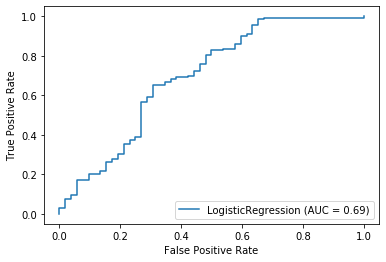

In [55]:
metrics.plot_roc_curve(log_reg,scaled_xtest,ytest)
plt.show()

In [ ]:
log_reg = LogisticRegression()